In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [ ]:
from sklearn.datasets import fetch_20newsgroups_vectorized

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
y = newsgroups.target
X = newsgroups.data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
#lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter = 10000)

In [14]:
#lr.fit(X_train, y_train)

In [15]:
#lr_predict = lr.predict(X_test)

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [17]:
#confusion_matrix(y_test, lr_predict)

In [18]:
#lr.score(X_test, y_test)

In [19]:
#model = SVC(gamma='auto')

In [20]:
#model.fit(X_train, y_train)
#predict = model.predict(X_test)

In [21]:
#confusion_matrix(y_test, predict)

In [22]:
#model.score(X_test, y_test)

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
y = pd.DataFrame(newsgroups.target, columns=['results'])
y.head()

,results
0,17
1,7
2,10
3,10
4,7


In [25]:
df.isna().sum()

input    0
dtype: int64

In [26]:
data = df.copy()
data['results'] = y.copy()['results'] # combining input and output into one table
train_data = data.sample(frac=0.8, random_state=0)
test_data = data.drop(train_data.index)

In [27]:
train_labels = train_data.copy()['results']
test_labels = test_data.copy()['results']

In [28]:
train_data = train_data.drop('results', axis=1)
test_data = test_data.drop('results', axis=1)

In [29]:
#norm_test_data = (test_data - test_data.describe().transpose()['mean']) / test_data.describe().transpose()['std']
#norm_train_data = (train_data - train_data.describe().transpose()['mean']) / train_data.describe().transpose()['std']

In [30]:
#norm_test_data[0].head()

In [31]:
train_data.shape

(9051, 1)

In [37]:
def build_model():
    model = keras.Sequential([
  
        layers.Dense(5, activation='tanh', input_shape= [len(train_data.keys())]),
        #layers.Dense(1024, activation='tanh'),
        #layers.Dense(1024, activation='relu'),
        layers.Dense(20, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [38]:
nn_model = build_model()

In [39]:
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_5 (Dense)              (None, 20)                120       
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________


In [40]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 350

history = nn_model.fit(
    #norm_train_data, train_labels,
    train_data, train_labels,
    epochs=EPOCHS, validation_split=0.2, verbose=0,
    callbacks=[PrintDot()])

ValueError: setting an array element with a sequence.

In [48]:
df.iloc[0]

input      (0, 5022)\t0.017109647770728872\n  (0, 5886)...
Name: 0, dtype: object

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [4]:
from sklearn.datasets import fetch_olivetti_faces

In [5]:
ovf = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\AdamK\scikit_learn_data


In [6]:
df = pd.DataFrame(ovf.data)
actual = pd.DataFrame(ovf.target, columns=['results'])

In [7]:
df.shape

(400, 4096)

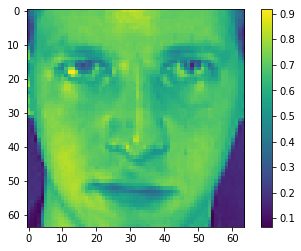

In [8]:
plt.figure()
plt.imshow(ovf.images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
y = actual['results']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0)

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter = 10000)

In [12]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
lr_predict = lr.predict(X_test)

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [15]:
confusion_matrix(y_test, lr_predict)

array([[4, 0, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [16]:
lr.score(X_test, y_test)

0.9625

In [17]:
model = SVC(gamma='auto')

In [18]:
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [19]:
confusion_matrix(y_test, predict)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
model.score(X_test, y_test) #wow that is a terrible score... Did I do something wrong?

0.0

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
y = pd.DataFrame(ovf.target, columns=['results'])
y.head()

,results
0,0
1,0
2,0
3,0
4,0


In [23]:
df.isna().sum()

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
4066    0
4067    0
4068    0
4069    0
4070    0
4071    0
4072    0
4073    0
4074    0
4075    0
4076    0
4077    0
4078    0
4079    0
4080    0
4081    0
4082    0
4083    0
4084    0
4085    0
4086    0
4087    0
4088    0
4089    0
4090    0
4091    0
4092    0
4093    0
4094    0
4095    0
Length: 4096, dtype: int64

In [24]:
data = df.copy()
data['results'] = actual.copy()['results'] # combining input and output into one table
train_data = data.sample(frac=0.8, random_state=0)
test_data = data.drop(train_data.index)

In [25]:
train_labels = train_data.copy()['results']
test_labels = test_data.copy()['results']

In [26]:
train_data = train_data.drop('results', axis=1)
test_data = test_data.drop('results', axis=1)

In [27]:
train_data.shape

(320, 4096)

In [32]:
train_labels

132    13
309    30
341    34
196    19
246    24
60      6
155    15
261    26
141    14
214    21
37      3
134    13
113    11
348    34
12      1
59      5
293    29
140    14
206    20
199    19
176    17
268    26
124    12
344    34
175    17
313    31
78      7
15      1
286    28
102    10
       ..
331    33
123    12
222    22
62      6
302    30
130    13
187    18
23      2
43      4
0       0
201    20
339    33
98      9
387    38
178    17
256    25
94      9
369    36
95      9
351    35
169    16
69      6
305    30
48      4
207    20
279    27
227    22
148    14
143    14
180    18
Name: results, Length: 320, dtype: int32

In [33]:
def build_model():
    model = keras.Sequential([
        layers.Dense(5, activation='tanh', input_shape=[len(train_data.keys())]),
        #layers.Dense(1024, activation='tanh'),
        #layers.Dense(1024, activation='relu'),
        layers.Dense(40, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [34]:
nn_model = build_model()

In [35]:
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 5)                 20485     
_________________________________________________________________
dense_3 (Dense)              (None, 40)                240       
Total params: 20,725
Trainable params: 20,725
Non-trainable params: 0
_________________________________________________________________


In [36]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 350

history = nn_model.fit(
    #norm_train_data, train_labels,
    train_data, train_labels,
    epochs=EPOCHS, validation_split=0.2, verbose=0,
    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
..................................................